In [3]:
import xml.etree.ElementTree as ET
import numpy as np
from svg.path import parse_path
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
tree = ET.parse('svg/brain.svg')
root = tree.getroot()

svg = list(root.findall('*'))[-1]

In [5]:
resolution = 2
error = 1e-6
polygons = []
for p in list(svg.findall('{http://www.w3.org/2000/svg}path')):
    path = parse_path(p.get('d'))
    num_points = int(path.length(error=error)*resolution)
    points = [path.point(i/num_points, error=error) for i in range(num_points)]
    points = [np.array([point.real, point.imag]) for point in points]
    polygons.append(points)

In [6]:
def transform(point, origin, theta):
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
    return R.dot(np.array(point-origin))

In [20]:
def check_bounds(point, max_coord):
    return 0<point[0]<max_coord[0] and 0<point[1]<max_coord[1]
def check_dist(p1, p2):
    return np.linalg.norm(p1-p2) < 1.0

In [24]:
def bound_box(polygons, Ox, Oy, theta, max_x, max_y):
    origin = np.array([Ox, Oy])
    max_coord = np.array([max_x, max_y])
    new_polygons = []
    for polygon in polygons:
        new_polygon = []
        for point in polygon+[[float('inf'), 0]]:
            p = transform(point, origin, theta)
            if check_bounds(p, max_coord) and (len(new_polygon) == 0 or check_dist(p, new_polygon[-1])):
                new_polygon.append(p)
            elif len(new_polygon) > 0:
                new_polygons.append(new_polygon)
                new_polygon = []
    return new_polygons

In [28]:
def scatter_my_ass(polygons):
    x_values = []
    y_values = []
    
    fig, ax = plt.subplots(figsize=(10, 10))

    for polygon in polygons:
        print(len(polygon))
        x_values += [point[0] for point in polygon]
        y_values += [point[1] for point in polygon]
        x_vals = [point[0] for point in polygon]
        y_vals = [point[1] for point in polygon]
        ax.plot(x_vals, y_vals)#, s=0.1)

53
53
17
17
17
17
17
17
17
17
52
25
52
25
40
20
40
20
65
27
48
22
65
28
48
22
2424
29
29
29
29
29
30
29
29
29
29
29
226
263
267
222
29
253
29
28
253
29
29


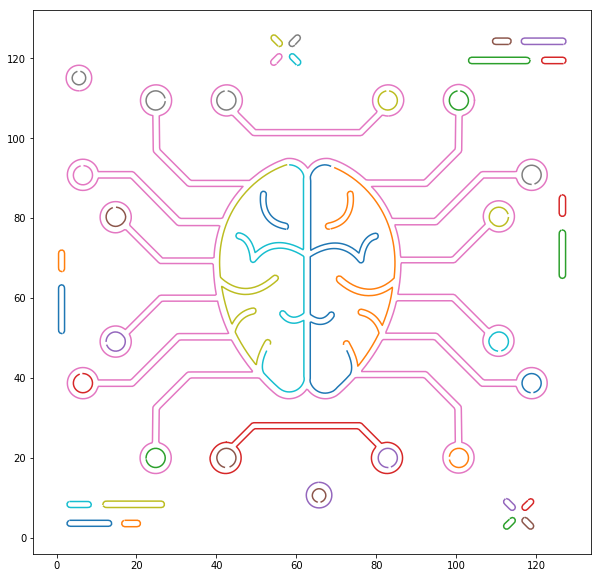

In [29]:
new_polygons = bound_box(polygons, 0, 0, 0.0, 300, 300)
scatter_my_ass(new_polygons)

In [27]:
len(new_polygons)

49